# MNIST by Keras

In [1]:
import tensorflow

In [2]:
tensorflow.__version__

'2.5.0'

In [3]:
from tensorflow import keras
keras.__version__

'2.5.0'

In [4]:
# 載入MNIST資料
from tensorflow import keras
mnist = keras.datasets.mnist
# 將資料集分為訓練及測試
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# 6萬筆資料，大小28*28
x_train.shape

(60000, 28, 28)

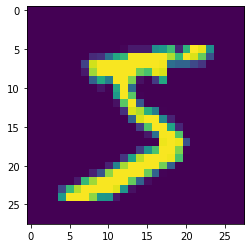

In [6]:
# 打開第一張圖片
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [7]:
# 查看對應答案
y_train[0]

5

In [9]:
# 把訓練及測試資料改成二維度，28*28=784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [10]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [11]:
# 將資料標準化
x_train = x_train / 255.0
x_test = x_test / 255.0

###建立模型

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 先開一個空的架構
model = Sequential()
# Dense: x * w + b
# 輸入；256，activation用relu，隱藏層:2
model.add(Dense(256, activation = 'relu', input_shape = (784,)))
model.add(Dense(256, activation = 'relu'))
# 輸出0-9
model.add(Dense(10))

In [13]:
model.summary()
# 784*256+256=200960
# 256*256+256=65792
# 256*10+10=2570

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


###編譯

In [15]:
# 使用SparseCategoricalCrossentropy
# 優化器:sgd
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='sgd',
       loss=loss_fn,
       metrics=['accuracy'])

###訓練
- https://ithelp.ithome.com.tw/articles/10219945

In [16]:
model.fit(x_train, y_train, 
    epochs=15, batch_size = 256,  #跑15次
    validation_data = (x_test, y_test))

Epoch 1/15
235/235 [==============================] - 4s 4ms/step - loss: 1.7193 - accuracy: 0.5905 - val_loss: 1.0474 - val_accuracy: 0.7956
Epoch 2/15
235/235 [==============================] - 1s 3ms/step - loss: 0.7778 - accuracy: 0.8289 - val_loss: 0.5834 - val_accuracy: 0.8609
Epoch 3/15
235/235 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.8661 - val_loss: 0.4527 - val_accuracy: 0.8824
Epoch 4/15
235/235 [==============================] - 1s 3ms/step - loss: 0.4380 - accuracy: 0.8828 - val_loss: 0.3941 - val_accuracy: 0.8942
Epoch 5/15
235/235 [==============================] - 1s 3ms/step - loss: 0.3918 - accuracy: 0.8928 - val_loss: 0.3593 - val_accuracy: 0.9039
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.8990 - val_loss: 0.3360 - val_accuracy: 0.9081
Epoch 7/15
235/235 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.9042 - val_loss: 0.3193 - val_accuracy: 0.9120
Epoch 

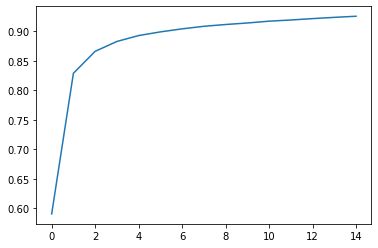

In [17]:
# 畫出準確率
plt.plot(range(len(model.history.history['accuracy'])), model.history.history['accuracy'])

###匯出模型

In [18]:
model.save('model.h5') # h5是keras的檔案

In [21]:
# 讀出檔案
from tensorflow.keras.models import load_model
model2 = load_model('model.h5')